# Servette FC Data Analysis - KickOff Meeting 16.04.2024

Einführungstext

Ziel:
- Dokumentation der Visualisierung für das KickOff Meeting mit neuem Präsidenten SFC vom 16. April

Scope: Daten aus Transfermarkt

bsp:
**Introduction**
Brief introduction to the topic and its relevance to Servette FC.

**Objectives**
- Primary objectives of this analysis.
- Questions to answer or hypotheses to test.

**Data Source**
Description of the data source and data loading:
- '../data/cleaned/players_2022_2023_cleaned.csv'
- '../data/cleaned/players_2023_2024_cleaned.csv'
- playing_minutes_2022_2023
- playing_minutes_2023_2024

In [324]:
# Data Loading
import pandas as pd

# files (might) needed for this script
players_2223 = pd.read_csv('../data/cleaned/players_2022_2023_cleaned.csv')
players_2324 = pd.read_csv('../data/cleaned/players_2023_2024_cleaned.csv') #last matchday scraped = Round 31 (6th/7th April 2024)

playedmin_2223 = pd.read_csv('playing_minutes_2022_2023.csv')
playedmin_2324 = pd.read_csv('playing_minutes_2023_2024.csv') #last matchday scraped = Round 31 (6th/7th April 2024)

lineups = pd.read_csv('../data/cleaned/lineups_2023_2024_SL_cleaned.csv') #used in chapter 3
m_info = pd.read_csv('../data/matches_info_2023_2024_merged.csv') #used in chapter 3
events = pd.read_csv('../data/match_events_2023_2024_merged.csv') #used in chapter 3


In [325]:
## TODO quick overview of 'played-minutes' data files + 'lineups' data file

In [326]:
#short overview of the data 2022/2023 regarding the players
print("quick snapshot of the data 2022/2023")
print(players_2223.shape)
print(players_2223.sample(10))
#print(players_2223.info())
print("amount of NaN values in the data 2022/2023")
print(players_2223.isnull().sum())
#descriptive statistics for the 2022/2023 season
print(players_2223.describe())



quick snapshot of the data 2022/2023
(370, 12)
                Name            Position   Birthdate Height   Foot  \
122        Lukas Mai         Centre-Back  2000-03-31  1,88m  right   
49    Diogo Monteiro         Centre-Back  2005-01-28  1,86m  right   
205    Isaac Schmidt           Left-Back  1999-12-07  1,72m  right   
257    Donis Avdijaj         Left Winger  1996-08-25  1,73m  right   
214      Edis Bytyqi    Central Midfield  2003-02-27  1,75m  right   
85    Cédric Zesiger         Centre-Back  1998-06-24  1,94m   left   
355       Musa Araz     Central Midfield  1994-01-17  1,73m   left   
357     José Aguilar    Central Midfield  2001-02-05  1,72m          
136  Ousmane Doumbia  Defensive Midfield  1992-05-21  1,74m  right   
222  Julian Von Moos        Right Winger  2001-04-01  1,81m   left   

    ContractBegin  ContractEnd  Value                Club  Club_Number  Age  \
122    2022-07-01          NaN    2.0           FC Lugano         2790   23   
49     2020-06-15       

In [327]:
# show all distinct values in the column 'Club' and its count
print(players_2223['Club'].value_counts())

Club
FC Basel 1893              43
FC Lugano                  40
FC Luzern                  40
Servette FC                37
BSC Young Boys             37
FC Sion                    37
FC Zürich                  36
FC St. Gallen 1879         35
Grasshopper Club Zurich    33
FC Winterthur              32
Name: count, dtype: int64


**Insights**
data of season 2022/2023 has the following NaN:
- 31 NaN in `ContractBegin`
- 370 NaN in `ContractEnd`, i.e. no values in that column --> *can't be used for the analysis regarding Contract Duration*

everything else is complete

In [328]:
#short overview of the data 2023/2024
print("quick snapshot of the data 2023/2024")
print(players_2324.shape)
print(players_2324.sample(10))
#print(players_2324.info())
print("amount of NaN values in the data 2023/2024")
print(players_2324.isnull().sum())
#descriptive statistics for the 2023/2024 season
print(players_2324.describe())

quick snapshot of the data 2023/2024
(360, 12)
                 Name            Position   Birthdate Height   Foot  \
352   Randy Schneider  Attacking Midfield  2001-08-27  1,70m  right   
27       Yusuf Demir         Right Winger  2003-06-02  1,71m   left   
235     Fabian Rohner        Right Winger  1998-08-17  1,78m  right   
247       Joshua Laws         Centre-Back  1998-02-26  1,85m   left   
345     Adrian Durrer  Defensive Midfield  2001-07-13  1,88m  right   
37       Jérémy Frick          Goalkeeper  1993-03-08  1,92m   left   
322   Mischa Eberhard    Central Midfield  2002-04-11  1,73m  right   
321     Edmond Akichi  Defensive Midfield  1990-04-24  1,78m  right   
340  Souleymane Diaby           Left-Back  1999-10-08  1,73m   left   
298      Varol Tasar         Right Winger  1996-10-04  1,74m   left   

    ContractBegin   ContractEnd  Value                     Club  Club_Number  \
352   Jul 1, 2023  Jun 30, 2026    0.8            FC Winterthur          242   
27   Aug 16

In [329]:
# show the 9 NaN values in the col 'ContractEnd' in 2023/2024
players_2324[players_2324.isnull().any(axis=1)]


,Name,Position,Birthdate,Height,Foot,ContractBegin,ContractEnd,Value,Club,Club_Number,Age,Season
99,Noah De Queiroz,Centre-Back,2002-12-10,"1,82m",right,NaN,"Jun 30, 2024",0.1,FC Lugano,2790,21,2023_2024
106,Ilija Maslarov,Defensive Midfield,2007-01-02,"1,81m",right,NaN,"Jun 30, 2024",0.2,FC Lugano,2790,17,2023_2024
113,Gianluca Pizzagalli,Right Midfield,2003-03-10,"1,77m",right,NaN,"Jun 30, 2024",0.1,FC Lugano,2790,21,2023_2024
195,Corsin Konietzke,Defensive Midfield,2006-06-21,"1,85m",right,NaN,"Jun 30, 2024",0.2,FC St. Gallen 1879,257,17,2023_2024
206,Albin Krasniqi,Right Winger,2003-04-06,"1,80m",right,NaN,"Jun 30, 2024",0.5,FC St. Gallen 1879,257,21,2023_2024
238,Labinot Bajrami,Centre-Forward,2005-06-04,"1,87m",right,NaN,"Jun 30, 2024",0.4,FC Zürich,260,18,2023_2024
248,Elvir Zukaj,Centre-Back,2002-07-07,"1,94m",right,NaN,-,0.1,Grasshopper Club Zurich,504,21,2023_2024
257,Noah Blasucci,Central Midfield,1999-06-19,"1,75m",right,NaN,"Jun 30, 2024",0.1,Grasshopper Club Zurich,504,24,2023_2024
266,Damian Nigg,Left Winger,2005-04-12,"1,78m",right,NaN,"Jun 30, 2024",0.2,Grasshopper Club Zurich,504,18,2023_2024


In [330]:
# show all distinct values in the column 'Club' and its count
print(players_2324['Club'].value_counts())

Club
FC Basel 1893              36
FC Lugano                  34
Yverdon Sport FC           34
Grasshopper Club Zurich    31
FC Luzern                  30
FC St. Gallen 1879         30
Servette FC                29
FC Zürich                  29
FC Winterthur              28
FC Lausanne-Sport          27
FC Stade-Lausanne-Ouchy    27
BSC Young Boys             25
Name: count, dtype: int64


Insights: data of season 2023/2024 has the following NaN:
- 9 NaN in `ContractBegin` --> non of them are Servette FC players (3x Lugano, 2x St. Gallen, 1x FCZ, 3x GC)

everything else is complete.
Now we're ready, no missing values - great :)

In [331]:
# Analysis 1: [Topic Name, e.g., "Players Contract vs Age"]

## 1.1 Servette FC Analysis
### Short introduction to the analysis (2-3 lines, what is the analysis about)

### Data Source
#- used data source, e.g., "FIFA 21 Player Dataset".
#- used data variables, e.g., "Player Name, Age, Contract End Year, etc."

### Data Preparation
#- Steps to prepare and clean the data specific to Servette FC.

### Descriptive Statistics
#- Summary statistics that provide insight into the dataset.

### Visualizations
#- Visualizations relevant to Servette FC.
#- Interpretations from the visualizations.

### Insights and Recommendations
#- Key findings.
#- Strategic recommendations based on the analysis.


## 1. Analysis I: Servette FC

Kurze Einführung

### 1.1 Contract vs Duration (current)

**Notes**:
- Datasource `players_2023_2024_cleaned`
- Data from last season (`players_2022_2023_cleaned`) can't be used here due to missing values for Contract End
- ...

This visualization provides a comprehensive view of the contract durations for the players of Servette FC for the current season. By displaying the age at which each player began their contract (`ContractBegin`) against their age at the end of the contract (`ContractEnd`), along with their current age, we can assess several important factors:

- **Player Lifecycle**: Understanding at what age players are typically signed and how long they stay with the club.
- **Future Planning**: Identifying potential gaps in the squad that may arise as a cluster of contracts end around the same time.
- **Age Profile**: Examining the age profile of the team’s assets to ensure a good balance between youth and experience.

This visualization aids the management and coaching staff in strategic planning, contract negotiations, and maintaining a balanced and competitive squad.

#### 1.1.1 Data Preprocessing

In [332]:
# Filter the DataFrame for only Servette FC players
df_servette_2324 = players_2324[players_2324['Club'] == 'Servette FC'].copy()

# Convert the 'Birthdate', 'ContractBegin', and 'ContractEnd' to datetime objects
df_servette_2324['Birthdate'] = pd.to_datetime(df_servette_2324['Birthdate'], errors='coerce')
df_servette_2324['ContractBegin'] = pd.to_datetime(df_servette_2324['ContractBegin'], format='%b %d, %Y', errors='coerce')
df_servette_2324['ContractEnd'] = pd.to_datetime(df_servette_2324['ContractEnd'], format='%b %d, %Y', errors='coerce')

# Calculate the age at contract begin and contract end
df_servette_2324['AgeAtContractStart'] = df_servette_2324['ContractBegin'].dt.year - df_servette_2324['Birthdate'].dt.year
df_servette_2324['AgeAtContractEnd'] = df_servette_2324['ContractEnd'].dt.year - df_servette_2324['Birthdate'].dt.year

df_servette_2324

,Name,Position,Birthdate,Height,Foot,ContractBegin,ContractEnd,Value,Club,Club_Number,Age,Season,AgeAtContractStart,AgeAtContractEnd
36,Joël Mall,Goalkeeper,1991-04-05,"1,97m",right,2023-07-01,2025-06-30,0.5,Servette FC,61,33,2023_2024,32,34
37,Jérémy Frick,Goalkeeper,1993-03-08,"1,92m",left,2016-07-01,2027-06-30,0.5,Servette FC,61,31,2023_2024,23,34
38,Léo Besson,Goalkeeper,2002-10-27,"1,87m",right,2023-04-08,2026-06-30,0.1,Servette FC,61,21,2023_2024,21,24
39,Yoan Severin,Centre-Back,1997-01-24,"1,86m",left,2018-07-17,2026-06-30,1.5,Servette FC,61,27,2023_2024,21,29
40,Dylan Bronn,Centre-Back,1995-06-19,"1,86m",right,2024-02-15,2024-06-30,1.5,Servette FC,61,28,2023_2024,29,29
41,Omar Rekik,Centre-Back,2001-12-20,"1,88m",right,2024-02-01,2024-06-30,0.5,Servette FC,61,22,2023_2024,23,23
42,Jérôme Onguéné,Centre-Back,1997-12-22,"1,86m",right,2023-08-04,2024-06-30,0.5,Servette FC,61,26,2023_2024,26,27
43,Anthony Baron,Centre-Back,1992-12-29,"1,80m",left,2022-07-20,2024-06-30,0.3,Servette FC,61,31,2023_2024,30,32
44,Steve Rouiller,Centre-Back,1990-07-10,"1,83m",right,2018-07-01,2025-06-30,0.2,Servette FC,61,33,2023_2024,28,35
45,Bradley Mazikou,Left-Back,1996-06-02,"1,72m",right,2023-07-01,2025-06-30,1.4,Servette FC,61,27,2023_2024,27,29


In [333]:
df_servette_2324.shape

(29, 14)

In [334]:
# since we might need 'Birthday', 'ContractBegin', 'ContractEnd' also in the dataset of last season, we will add them to the dataset of 2022/2023
# Filter the DataFrame for only Servette FC players
df_servette_2223 = players_2223[players_2223['Club'] == 'Servette FC'].copy()

# Convert the 'Birthdate', 'ContractBegin', and 'ContractEnd' to datetime objects
df_servette_2223['Birthdate'] = pd.to_datetime(df_servette_2223['Birthdate'], errors='coerce')
df_servette_2223['ContractBegin'] = pd.to_datetime(df_servette_2223['ContractBegin'], format='%b %d, %Y', errors='coerce')
df_servette_2223['ContractEnd'] = pd.to_datetime(df_servette_2223['ContractEnd'], format='%b %d, %Y', errors='coerce')


This preprocessing will enable us to examine the contract lengths in relation to the players' ages, as you've successfully created new fields that capture the age at which each player's contract began and will end. With this information, you can analyze the contract strategy of Servette FC and see how it evolves from season to season (excl. last season).

#### 1.1.2 Visualization

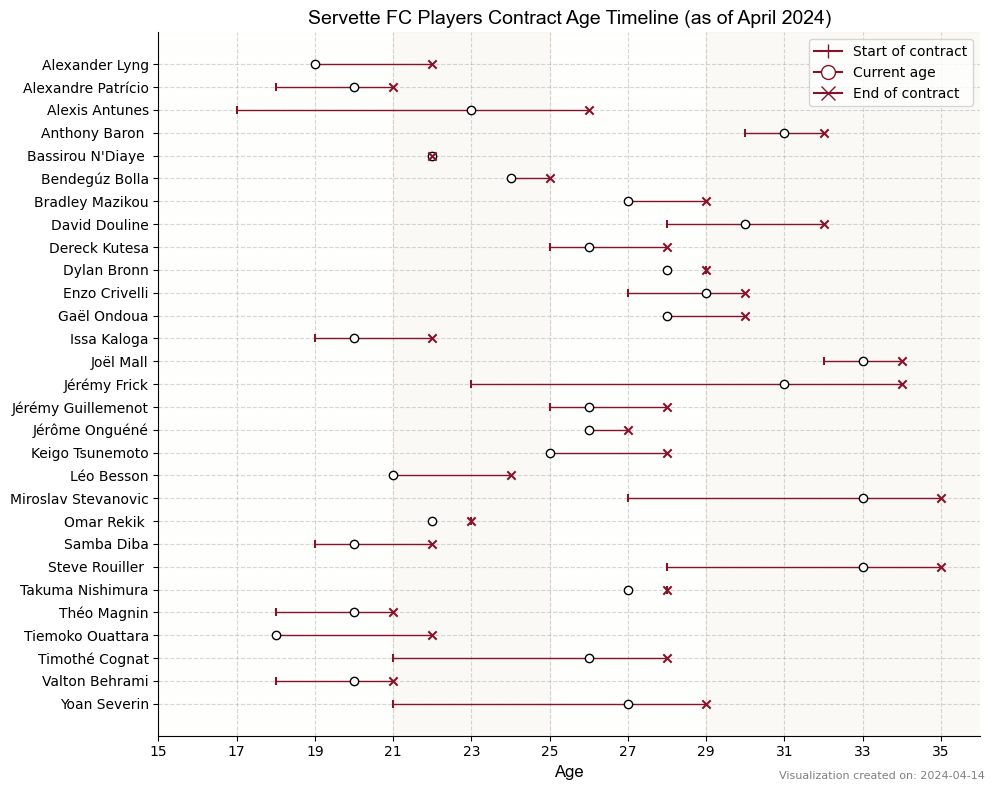

In [335]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

# Define your customizations here
font = 'Arial'
start_marker = '|'  # marker for start of contract
current_marker = 'o'  # marker for current age
end_marker = 'x'  # marker for end of contract
line_style = '-'  # line for connecting points
start_color = '#85142b'  # Color for start of contract
current_color = '#ffffff'  # Color for current age
end_color = '#85142b'  # Color for end of contract
line_color = '#85142b'  # Color for line connecting points

# Sort players by name for y-axis
df_servette_2324_sorted = df_servette_2324.sort_values('Name', ascending=False)

plt.figure(figsize=(10, 8))

# Plot age groups background color
age_categories = [(0, 21), (21, 25), (25, 29), (29, 40)]
colors = ['#FBF9F4', '#D3C5A3', '#FBF9F4', '#D3C5A3']  
for category, color in zip(age_categories, colors):
    plt.axvspan(*category, color=color, alpha=0.1)

# Customize the x-axis with the specified coordinates and range
plt.xticks(range(15, 37, 2))
plt.xlim(15, 36)  # Setting the limit of x-axis from 15

# Plot the contract durations and current ages with markers and lines
for name, row in df_servette_2324_sorted.iterrows():
    plt.plot([row['AgeAtContractStart'], row['AgeAtContractEnd']], [row['Name'], row['Name']],
             linestyle=line_style, linewidth=1, color=line_color, label='_nolegend_')
    plt.scatter(row['AgeAtContractStart'], row['Name'], color=start_color, marker=start_marker, zorder=5)
    plt.scatter(row['Age'], row['Name'], color=current_color, marker=current_marker, zorder=5, edgecolors='black')
    plt.scatter(row['AgeAtContractEnd'], row['Name'], color=end_color, marker=end_marker, zorder=5)

# Add labels and a title to the plot
plt.xlabel('Age', fontname=font, fontsize=12)
#plt.ylabel('Player', fontname=font, fontsize=12)
plt.title('Servette FC Players Contract Age Timeline (as of April 2024)', fontname=font, fontsize=14)

# Custom legend handles
legend_elements = [Line2D([0], [0], marker=start_marker, color='#85142b', label='Start of contract',
                          markerfacecolor=start_color, markersize=10),
                   Line2D([0], [0], marker=current_marker, color='#85142b', label='Current age',
                          markerfacecolor=current_color, markersize=10),
                   Line2D([0], [0], marker=end_marker, color='#85142b', label='End of contract',
                          markerfacecolor=end_color, markersize=10)]

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(handles=legend_elements, loc='upper right')

# Tighten the layout, enhance the visual appeal
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a note about the creation date of the visual
creation_date_note = f"Visualization created on: {datetime.now().strftime('%Y-%m-%d')}"
plt.figtext(0.99, 0.02, creation_date_note, horizontalalignment='right', fontsize=8, color='gray')


plt.show()


In [336]:
# Assuming 'df_servette_2324' is the DataFrame and 'current_season_year' is defined as the latest year of the season
current_season_year = 2024
next_season_year = current_season_year + 1

# Calculate the number of contracts expiring by the end of the next season
expiring_contracts = df_servette_2324[df_servette_2324['ContractEnd'].dt.year <= next_season_year]

# Calculate this as a percentage of the total number of players
percentage_expiring = (len(expiring_contracts) / len(df_servette_2324)) * 100

# Formulate the statement
statement = f"{percentage_expiring:.0f}% of Servette FC's player contracts are set to conclude by the end of {next_season_year}, indicating a pivotal period for team planning and negotiations."
statement

"66% of Servette FC's player contracts are set to conclude by the end of 2025, indicating a pivotal period for team planning and negotiations."

**Interpretation of Servette FC Players' Contract Age Timeline**

The visualization depicts the age range during which Servette FC players are under contract, alongside their current age, providing insights into the club's contractual engagements.

Insights and Abnormalities:
- The majority of contracts start when players are between 20 and 25 years of age, suggesting a focus on developing players who are approaching or at the peak of their careers.
- There is a notable cluster of contracts ending when players are around 30 years old, indicating a possible club strategy of re-evaluating players' contributions as they exit their peak performance years.
- A few players have notably longer contracts, which may signify a high level of trust and investment in those individuals by the club.
- The presence of several players under 21 with active contracts suggests that the club values the cultivation of young talent.

Age Group Considerations:
- Players under 21 are on the rise, indicating a healthy pipeline for future team development.
- The 22-25 age group forms the core of the team, with most current ages and contract starts falling within this bracket, highlighting the club's current competitive strategy.
- The 26-29 bracket shows fewer contract starts but many current ages, suggesting experienced players are often retained.
- Players 30 and above are fewer, suggesting a natural tapering as players' careers progress.

**One-Sentence Summary (for Pitch Slide)** 
"66% of Servette FC's player contracts are set to conclude by the end of 2025, indicating a pivotal period for team planning and negotiations."


### 1.2 Marketvalue vs Age

This visualization aims to compare the market value of Servette FC players against their age. We will plot data from two seasons — 2022/2023 and 2023/2024 — to observe changes and trends over time. This analysis can help in understanding how a player's value evolves with age and can be crucial for financial planning and transfer strategies. A player's peak market value often correlates with their peak performance years, and tracking this can aid in making informed decisions about contract negotiations, player sales, and acquisitions.

**Notes**:
- Datasource `players_2022_2023_cleaned` and `players_2023_2024_cleaned`

#### 1.2.1 Data Preprocessing

In [337]:
# show amount of NaN in the column 'Value' for 2022/2023 and 2023/2024
print("Amount of NaN in the column 'Value' for 2022/2023")
print(players_2223['Value'].isnull().sum())
print("*"*50)
print("Amount of NaN in the column 'Value' for 2023/2024")
print(players_2324['Value'].isnull().sum())


Amount of NaN in the column 'Value' for 2022/2023
0
**************************************************
Amount of NaN in the column 'Value' for 2023/2024
0


No Data Preprocessing needed

#### 1.2.2 Visualization (ShittyFirstDraft)

Lets start with a first version of the Visual.

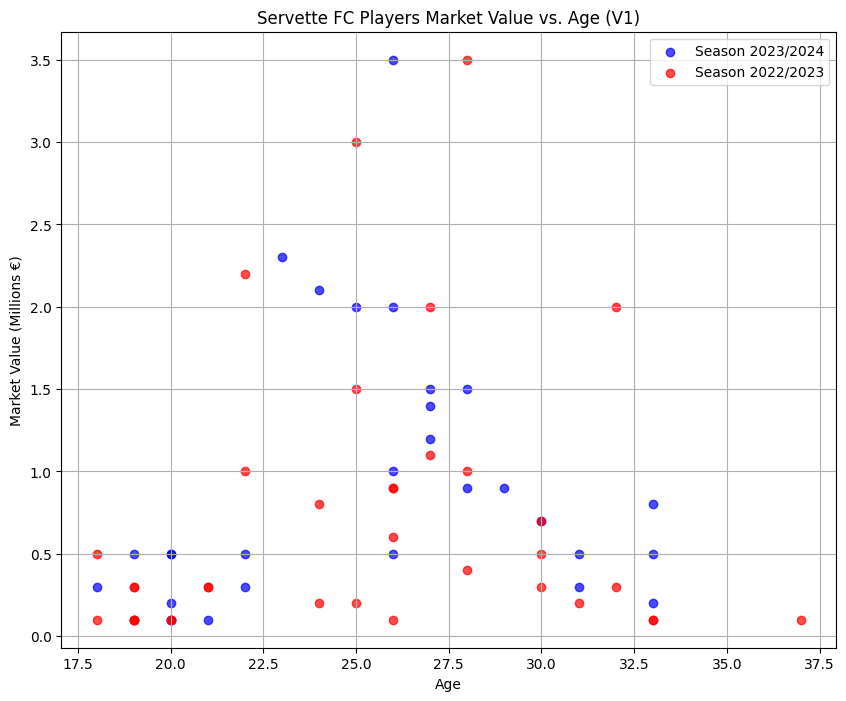

In [338]:
# Visualize the data
plt.figure(figsize=(10, 8))
# Plot for season 2023/2024
plt.scatter(df_servette_2324['Age'], df_servette_2324['Value'], color='blue', label='Season 2023/2024', alpha=0.7)
# Plot for season 2022/2023
plt.scatter(df_servette_2223['Age'], df_servette_2223['Value'], color='red', label='Season 2022/2023', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Market Value (Millions €)')
plt.title('Servette FC Players Market Value vs. Age (V1)')
plt.legend()
plt.grid(True)
plt.show()

**Improvements to Do**
- only take the players that have a critical number of played minutes (otherwise to many data points)
- only take the players that have been at Servette for both seasons (otherwise can't compare it/no additional value)
- add the name of the player in the scatterplot (otherwise too less information in the plot)
- adjust x-axis + insert 'age groups' (analog 1.1.2)

## 2. Analysis II: Servette FC vs BSC Young Boys

Kurze Einführung

### 2.1 Share of Played Minutes per Age Category (current season)

This visualization represents the distribution of played minutes among different age categories for Servette FC and BSC Young Boys for the current season. The age categories are divided as follows: 
- <22
- 22-25
- 26-29
- 30+

By comparing the minutes played across these age groups, we can derive insights into:
- The youth development focus of each club by looking at minutes allocated to younger players.
- The reliance on experienced players by observing the minutes given to the older age groups.
- The overall age-based squad utilization strategy which might indicate the club's long-term planning and investment in players of various ages.


#### 2.1.1 Data Preprocessing

In [339]:
playedmin_2324.sample(10)

,Player,Minutes Played,Starting,Substitute,Substituted In,Substituted Out,Position,Age,Market Value,Club
36,Armstrong Oko-Flex,202,1,24,11,1,Left Winger,22,NaN,FC Zürich
157,Jason Parente,5,0,1,1,0,Left Midfield,17,NaN,FC St. Gallen 1879
89,Dijon Kameri,252,2,4,4,2,Attacking Midfield,19,NaN,Grasshopper Club Zurich
68,Chima Okoroji,1184,12,15,9,7,Left-Back,26,NaN,FC St. Gallen 1879
355,Shkelqim Vladi,1129,14,12,9,11,Centre-Forward,23,NaN,FC Lugano
297,Nils de Mol,0,0,4,0,0,Goalkeeper,22,NaN,FC Basel 1893
155,Jarell Njiké Simo,0,0,1,0,0,Central Midfield,19,NaN,Servette FC
197,Kevin Spadanuda,423,3,14,11,3,Left Winger,27,NaN,FC Luzern
174,Jozo Stanic,1524,17,6,1,1,Centre-Back,24,NaN,FC St. Gallen 1879
241,Marwin Hitz,2340,26,0,0,0,Goalkeeper,36,NaN,FC Basel 1893


In [340]:
# filter the data for Servette FC and BSC YB
playedmin_2324_sfc_yb = playedmin_2324[(playedmin_2324['Club'] == 'Servette FC') | (playedmin_2324['Club'] == 'BSC Young Boys')].copy()
playedmin_2324_sfc_yb

,Player,Minutes Played,Starting,Substitute,Substituted In,Substituted Out,Position,Age,Market Value,Club
14,Alexander Lyng,0,0,8,0,0,Right Winger,19,NaN,Servette FC
16,Alexis Antunes,1508,18,6,4,13,Attacking Midfield,23,NaN,Servette FC
25,Anthony Baron,737,8,11,3,2,Centre-Back,31,NaN,Servette FC
26,Anthony Racioppi,1350,15,16,0,0,Goalkeeper,25,NaN,BSC Young Boys
39,Aurèle Amenda,1521,17,13,1,1,Centre-Back,20,NaN,BSC Young Boys
...,...,...,...,...,...,...,...,...,...,...
376,Tiemoko Ouattara,0,0,12,0,0,Left Winger,18,NaN,Servette FC
379,Timothé Cognat,2505,29,1,1,9,Central Midfield,26,NaN,Servette FC
385,Ulisses Garcia,882,9,5,5,3,Left-Back,27,NaN,BSC Young Boys
389,Vasco Tritten,0,0,1,0,0,Attacking Midfield,18,NaN,Servette FC


In [341]:
#categorize age into 4 groups: <22, 22-25, 26-29, 30+
bins = [0, 22, 25, 29, 100]
labels = ['<22', '22-25', '26-29', '30+']
playedmin_2324_sfc_yb['AgeGroup'] = pd.cut(playedmin_2324_sfc_yb['Age'], bins=bins, labels=labels, right=False)

# Calculate the total minutes played by each age group
age_group_minutes = playedmin_2324_sfc_yb.groupby('AgeGroup')['Minutes Played'].sum()

age_group_minutes

C:\Users\arnol\AppData\Local\Temp\ipykernel_27660\1155684098.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_minutes = playedmin_2324_sfc_yb.groupby('AgeGroup')['Minutes Played'].sum()


AgeGroup
<22       4266
22-25    12661
26-29    30171
30+      14751
Name: Minutes Played, dtype: int64

#### 2.1.2 Visualization

First Version

C:\Users\arnol\AppData\Local\Temp\ipykernel_27660\4057082846.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_minutes_by_club_age_group = playedmin_2324_sfc_yb.groupby(['Club', 'AgeGroup'])['Minutes Played'].sum().unstack(fill_value=0)


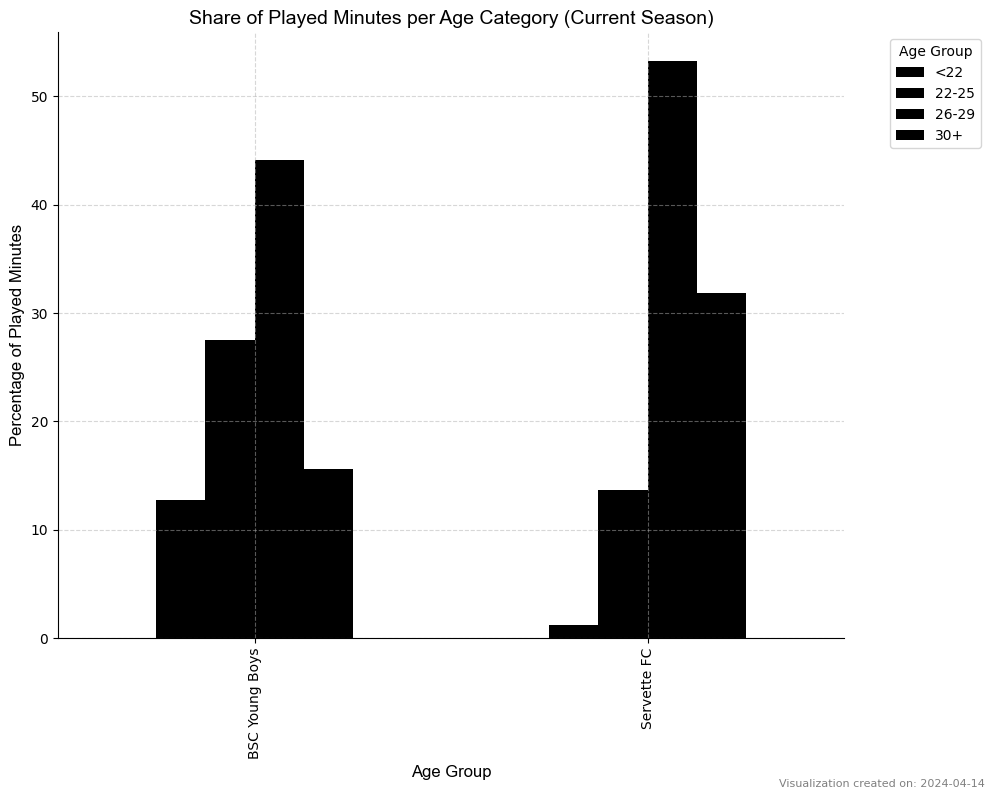

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Calculate the total minutes played by each age group for each club
total_minutes_by_club_age_group = playedmin_2324_sfc_yb.groupby(['Club', 'AgeGroup'])['Minutes Played'].sum().unstack(fill_value=0)

# Calculate the percentage of total minutes played by age group for each club
total_minutes_by_club = playedmin_2324_sfc_yb.groupby('Club')['Minutes Played'].sum()
percent_minutes_by_club_age_group = (total_minutes_by_club_age_group.T / total_minutes_by_club).T * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))
percent_minutes_by_club_age_group.plot(kind='bar', ax=ax, color=['black', 'black', 'black', 'black'])

# Customize the plot
ax.set_xlabel('Age Group', fontname='Arial', fontsize=12)
ax.set_ylabel('Percentage of Played Minutes', fontname='Arial', fontsize=12)
ax.set_title('Share of Played Minutes per Age Category (Current Season)', fontname='Arial', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the creation date at the bottom right
creation_date = datetime.now().strftime('%Y-%m-%d')
plt.figtext(0.99, 0.01, f'Visualization created on: {creation_date}', horizontalalignment='right', fontsize=8, color='gray')

plt.tight_layout()
plt.show()


New Approach

In [343]:
# Ensure 'Club' and 'AgeGroup' are not categoricals
playedmin_2324_sfc_yb['Club'] = playedmin_2324_sfc_yb['Club'].astype(str)
playedmin_2324_sfc_yb['AgeGroup'] = playedmin_2324_sfc_yb['AgeGroup'].astype(str)

# Group data by club and age group, then sum the minutes played
total_minutes = playedmin_2324_sfc_yb.groupby(['Club', 'AgeGroup'])['Minutes Played'].sum().unstack(fill_value=0)

# Calculate the percentage of total minutes played by age group for each club
# Normalize within each club
total_minutes_percent = total_minutes.div(total_minutes.sum(axis=1), axis=0) * 100


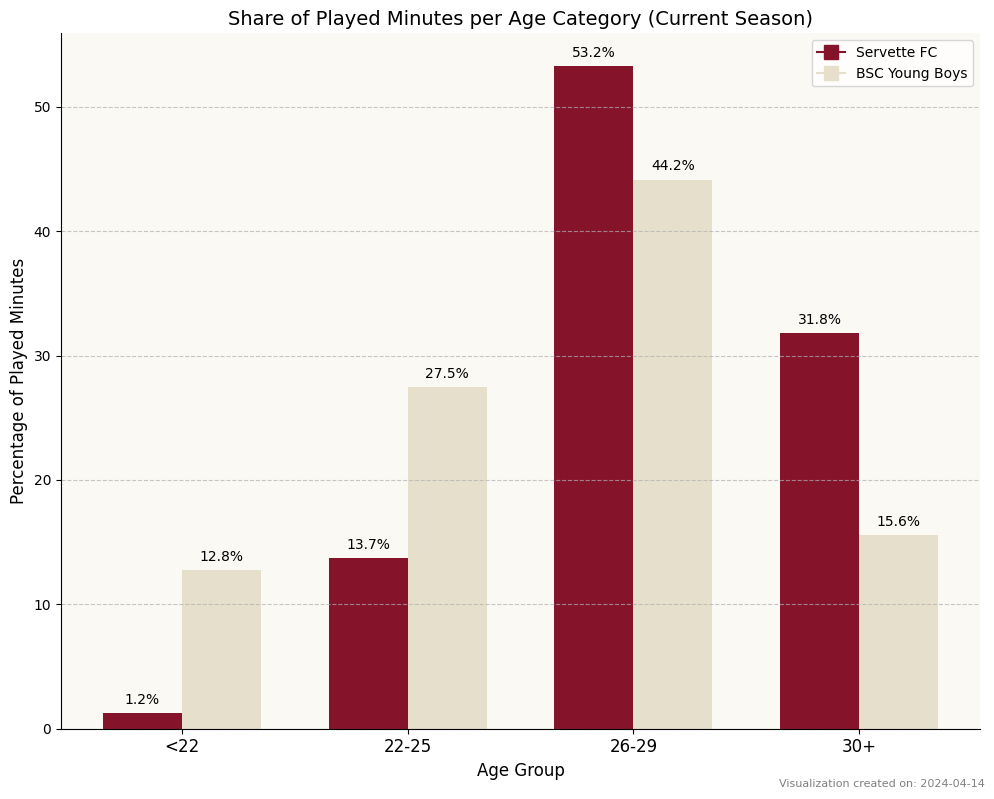

In [344]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib.lines import Line2D

# Assuming 'total_minutes_percent' is the DataFrame with percentage values

# Define colors for each team and background
servette_color = '#85142b'  # dark red
yb_color = '#E6DFCC'  
background_color = '#FBF9F4'  # for the plot background

# Create subplots with a background color
fig, ax = plt.subplots(figsize=(10, 8))
#fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Set up bar positions
n_groups = len(total_minutes_percent.columns)
index = np.arange(n_groups)
bar_width = 0.35

# Sort the columns as per the order of age groups before plotting
sorted_columns = ['<22', '22-25', '26-29', '30+']
total_minutes_percent = total_minutes_percent[sorted_columns]

# Plot bars for each team
for i, (club_name, row) in enumerate(total_minutes_percent.iterrows()):
    if club_name == 'Servette FC':
        bars = ax.bar(index - bar_width/2, row, bar_width, label=club_name if i == 0 else "", color=servette_color)
    else:
        bars = ax.bar(index + bar_width/2, row, bar_width, label=club_name if i == 0 else "", color=yb_color)
    
    # Add text on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# Set the x-axis and y-axis labels
ax.set_xticks(index)
ax.set_xticklabels(sorted_columns, fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Percentage of Played Minutes', fontsize=12)

# Set the title and legend
ax.set_title('Share of Played Minutes per Age Category (Current Season)', fontsize=14)

# Create legend handles
legend_elements = [Line2D([0], [0], color=servette_color, label='Servette FC', marker='s', markersize=10),
                   Line2D([0], [0], color=yb_color, label='BSC Young Boys', marker='s', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right')

# Add a grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a note about the creation date of the visual
creation_date_note = f"Visualization created on: {datetime.now().strftime('%Y-%m-%d')}"
plt.figtext(0.99, 0.01, creation_date_note, horizontalalignment='right', fontsize=8, color='gray')

# Show the plot
plt.tight_layout()
plt.show()



**Visualization Interpretation: Player Minutes by Age Category**

This bar chart provides a comparative analysis of the distribution of played minutes among different age categories for Servette FC and BSC Young Boys in the current season.

Insights and Observations
- **Youth Engagement**: Servette FC has a noticeably smaller proportion of minutes played by under-22 players compared to BSC Young Boys, suggesting a more conservative approach to fielding younger talents.
- **Peak Age Utilization**: Both clubs show a similar pattern in the 22-25 and 26-29 age brackets, indicating reliance on players considered to be in their peak athletic years.
- **Senior Player Dependence**: There's a striking contrast in the 30+ category, where Servette FC allocates significantly more minutes to senior players than BSC Young Boys, emphasizing Servette's dependence on the experience and leadership of older players.

Statistical Highlight
Servette FC's strategic use of experienced players is highlighted by over 53% of playtime given to those aged 26 and above, showcasing a blend of maturity and expertise in their squad dynamics.

**One-Sentence Summary (for Pitch Slide)**
"In the current seasyon, Servette FC showcases a strategic reliance on matured expertise with over half of the game time dedicated to players aged 26 and above, contrasting BSC Young Boys' focus on youthful vigor."


## 3. Analysis III: Super League Comparison

### 3.1 Stability Index vs. Average Points

**Definition and Rationale**
The Stability Index (SI) aims to quantify the consistency and reliability of a soccer team's lineup and performance across a season. A stable team typically exhibits fewer changes in its starting lineup, consistent performance in terms of match outcomes, and disciplined on-field behavior.

**Criteria for Stability Index**
- Lineup Consistency (LC): Measures how consistently the same players are starting matches. A lower number of different starters indicates a more stable lineup.
- Performance Consistency (PC): Evaluates the consistency in match outcomes (win, draw, loss). A team that has less fluctuation in match results can be considered more stable in performance.
- Disciplinary Record (DR): Assesses the number of disciplinary actions (yellow cards, red cards) a team receives. A team with fewer disciplinary actions is deemed more stable in terms of on-field behavior.

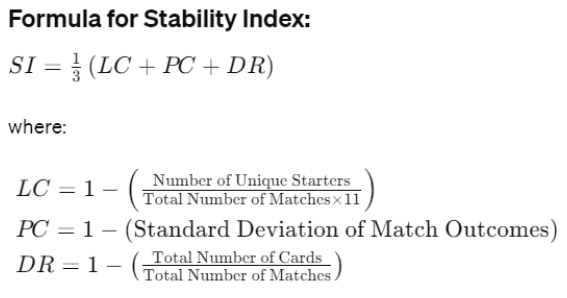

**Assumptions**
- The maximum number of starting players in a match is 11.
- Match outcomes are quantified as 3 points for a win, 1 point for a draw, and 0 points for a loss.
- Yellow cards count as 1, red cards as 2.

**Explanation**
- Lineup Consistency (LC): We normalize the number of unique starters by the total possible number of starting positions across all matches (Total Number of Matches × 11). A team that uses all its players equally would have an LC of 0, while a team that always uses the same starting lineup would have an LC close to 1.
- Performance Consistency (PC): We use the standard deviation of match outcomes to evaluate performance consistency. A lower standard deviation indicates that the team's performance (win/draw/loss) is more consistent.
- Disciplinary Record (DR): This metric is normalized by the number of matches to account for teams playing different numbers of matches (due to potential match cancellations or other reasons). A DR close to 1 indicates a team has very few cards per match, reflecting a stable disciplinary record.

For further information regarding calculations, thoughts etc. please go to our Jupiter Notebook file **Data_Analysis.ipynb** in the GitHub Repo: 
https://github.com/heinimoreno/PBL_RA_MH/tree/main

#### 3.1.1 Data Preprocessing

##### LineUp Consistency (LC)

In [345]:
lineups.sample(10)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID,matchday,weekday,date,time,Minutes Played,Player Event
6774,Left Midfield,Donat Rrudhani,24,€600k,FC Lausanne-Sport,"29. Matchday | Mon, 4/1/24 | 4:30 PM",Away,Starting,4244825,29. Matchday,Mon,2024-04-01,4:30 PM,62,Substituted Out
5703,Left-Back,Dominik Schmid,25,€1.70m,FC Basel 1893,"25. Matchday | Sat, 2/24/24 | 6:00 PM",Away,Starting,4244798,25. Matchday,Sat,2024-02-24,6:00 PM,90,NaN
6474,Right-Back,Lindrit Kamberi,24,€900k,FC Zürich,"28. Matchday | Sun, 3/17/24 | 2:15 PM",Home,Starting,4244818,28. Matchday,Sun,2024-03-17,2:15 PM,90,NaN
5843,Defensive Midfield,Sandro Lauper,27,€1.00m,BSC Young Boys,"25. Matchday | Sun, 2/25/24 | 4:30 PM",Home,Starting,4244802,25. Matchday,Sun,2024-02-25,4:30 PM,71,Substituted Out
414,Left Winger,Junior Zé,17,€100k,FC Basel 1893,"2. Matchday | Sun, 7/30/23 | 4:30 PM",Home,Substitute,4089703,2. Matchday,Sun,2023-07-30,4:30 PM,8,Substituted In
5612,Right Midfield,Dereck Kutesa,26,€1.70m,Servette FC,"24. Matchday | Sun, 2/18/24 | 4:30 PM",Home,Starting,4244796,24. Matchday,Sun,2024-02-18,4:30 PM,90,NaN
5446,Goalkeeper,Lawrence Ati Zigi,27,€2.50m,FC St. Gallen 1879,"24. Matchday | Sat, 2/17/24 | 6:00 PM",Home,Starting,4244792,24. Matchday,Sat,2024-02-17,6:00 PM,90,NaN
1844,Right-Back,Pius Dorn,27,€1.20m,FC Luzern,"8. Matchday | Thu, 9/28/23 | 8:30 PM",Away,Starting,4089739,8. Matchday,Thu,2023-09-28,8:30 PM,90,NaN
4487,Centre-Forward,Thierno Barry,21,€1.00m,FC Basel 1893,"19. Matchday | Sun, 1/21/24 | 4:30 PM",Away,Starting,4089806,19. Matchday,Sun,2024-01-21,4:30 PM,90,NaN
2089,Centre-Back,Dylan Ouedraogo,25,€450k,FC Stade-Lausanne-Ouchy,"9. Matchday | Sun, 10/1/23 | 4:30 PM",Away,Substitute,4089745,9. Matchday,Sun,2023-10-01,4:30 PM,0,NaN


In [346]:
# dictionary for values in 'Clubs' we want to keep
clubs_to_keep = {
    'FC St. Gallen 1879': 'FC St. Gallen 1879',
    'FC Basel 1893': 'FC Basel 1893',
    'Servette FC': 'Servette FC',
    'BSC Young Boys': 'BSC Young Boys',
    'FC Zürich': 'FC Zürich',
    'FC Lausanne-Sport': 'FC Lausanne-Sport',
    'FC Winterthur': 'FC Winterthur',
    'Grasshopper Club Zurich': 'Grasshopper Club Zurich',
    'FC Luzern': 'FC Luzern',
    'FC Lugano': 'FC Lugano',
    'FC Stade-Lausanne-Ouchy': 'SLO',
    'Yverdon Sport FC': 'Yverdon Sport FC' 
    
}

# filter the dataset
lineups_SL = lineups[lineups['Club'].isin(clubs_to_keep.keys())]

print(lineups_SL['Club'].value_counts())
print("*"*50)
print("Max. Players on LineUp Sheet per Match: 20")
print("Max. Players on LineUp Sheet current Season (until round 31): 20 * 31 = 620")

Club
FC Lausanne-Sport          620
FC Zürich                  620
Grasshopper Club Zurich    619
FC Winterthur              619
FC St. Gallen 1879         616
BSC Young Boys             615
FC Basel 1893              614
FC Luzern                  612
FC Lugano                  604
FC Stade-Lausanne-Ouchy    597
Yverdon Sport FC           594
Servette FC                569
Name: count, dtype: int64
**************************************************
Max. Players on LineUp Sheet per Match: 20
Max. Players on LineUp Sheet current Season (until round 31): 20 * 31 = 620


In [347]:
lineups_SL.sample(10)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID,matchday,weekday,date,time,Minutes Played,Player Event
4512,Centre-Back,Jonas Adjetey,20,€200k,FC Basel 1893,"20. Matchday | Sat, 1/27/24 | 8:30 PM",Home,Substitute,4089807,20. Matchday,Sat,2024-01-27,8:30 PM,0,NaN
4369,Second Striker,Alexis Antunes,23,€1.30m,Servette FC,"19. Matchday | Tue, 1/23/24 | 7:00 PM",Away,Starting,4089803,19. Matchday,Tue,2024-01-23,7:00 PM,67,Substituted Out
224,Right Midfield,Allan Arigoni,24,€800k,FC Lugano,"1. Matchday | Wed, 7/26/23 | 8:30 PM",Away,Starting,4089698,1. Matchday,Wed,2023-07-26,8:30 PM,79,Substituted Out
6232,Goalkeeper,Joël Mall,32,€500k,Servette FC,"27. Matchday | Sun, 3/10/24 | 2:15 PM",Home,Starting,4244812,27. Matchday,Sun,2024-03-10,2:15 PM,90,NaN
1823,Centre-Back,Adrian Leon Barisic,22,€2.00m,FC Basel 1893,"8. Matchday | Thu, 9/28/23 | 8:30 PM",Home,Starting,4089739,8. Matchday,Thu,2023-09-28,8:30 PM,90,NaN
1435,Left-Back,Morgan Poaty,26,€500k,FC Lausanne-Sport,"7. Matchday | Sat, 9/23/23 | 6:00 PM",Home,Substitute,4089729,7. Matchday,Sat,2023-09-23,6:00 PM,0,NaN
7169,Centre-Forward,Antonio Marchesano,33,€300k,FC Zürich,"31. Matchday | Sat, 4/6/24 | 8:30 PM",Away,Starting,4244835,31. Matchday,Sat,2024-04-06,8:30 PM,90,NaN
6945,Centre-Back,Berkay Dabanli,33,€200k,FC Lausanne-Sport,"30. Matchday | Thu, 4/4/24 | 8:30 PM",Home,Starting,4244830,30. Matchday,Thu,2024-04-04,8:30 PM,90,NaN
1139,Goalkeeper,Vaso Vasic,33,€200k,FC Luzern,"5. Matchday | Sun, 8/27/23 | 4:30 PM",Away,Substitute,4089721,5. Matchday,Sun,2023-08-27,4:30 PM,0,NaN
4718,Left-Back,Souleymane Diaby,24,€500k,FC Winterthur,"20. Matchday | Sat, 1/27/24 | 6:00 PM",Away,Starting,4089812,20. Matchday,Sat,2024-01-27,6:00 PM,82,Substituted Out


In [348]:
m_info.sample(5)

,Match ID,Home Team,Away Team,Result,League
80,4089773,Servette FC,FC Basel 1893,4:1\r\n(1:1),Super League
59,4089752,BSC Young Boys,FC Basel 1893,3:0\r\n(2:0),Super League
162,4244816,Grasshopper Club Zurich,FC St. Gallen 1879,1:1\r\n(0:1),Super League
25,4089718,FC Zürich,FC St. Gallen 1879,1:1\r\n(0:0),Super League
150,4244804,FC Stade-Lausanne-Ouchy,Grasshopper Club Zurich,1:1\r\n(1:1),Super League


In [349]:
# drop the columns 'HomeTeamPoints' and 'AwayTeamPoints'
# only needed if columns are present at this point
	
#m_info = m_info.drop(['HomeTeamPoints', 'AwayTeamPoints'], axis=1)

In [350]:
# getting rid of the '\r\n' in the result column
m_info['Result'] = m_info['Result'].str.replace('\r\n', ' ')

# adding new columns for the points the home and away team got in the match
## if the club won the match, they get 3 points, if they lost, they get 0 points, if they drew, they get 1 point
## relevant result is the first 3 characters of the 'Result' column (the last 5 characters is the half-time result, which is not relevant for this task)
m_info.insert(2, 'HomeTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] > x[2] else 1 if x[0] == x[2] else 0))
m_info.insert(3, 'AwayTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] < x[2] else 1 if x[0] == x[2] else 0))

# filter the dataset
# only keep the matches where the column 'Home Team' is in the dictionary 'clubs_to_keep'
m_info_SL = m_info[m_info['Home Team'].isin(clubs_to_keep.keys())]

m_info_SL['Home Team'].value_counts()

Home Team
FC St. Gallen 1879         16
FC Winterthur              16
FC Stade-Lausanne-Ouchy    16
Servette FC                16
FC Luzern                  16
Grasshopper Club Zurich    15
BSC Young Boys             15
FC Zürich                  15
FC Lausanne-Sport          15
FC Lugano                  15
FC Basel 1893              15
Yverdon Sport FC           15
Name: count, dtype: int64

Now we're ready for some calculations :)

In [351]:
# Step 1: Count the number of unique starters for each team
unique_starters = lineups_SL[lineups_SL['Status'] == 'Starting'].groupby('Club')['Player'].nunique()

# Step 2: Count the total number of matches for each team for parameter LC
total_matches = pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).value_counts() #LC (overall)
total_home_matches = m_info_SL['Home Team'].value_counts() #subparameter LC Home
total_away_matches = m_info_SL['Away Team'].value_counts() #subparameter LC Away

# Step 3: Calculate the LC for each team -> normalization [0, 1]
LC = 1 - (unique_starters / (total_matches * 11)) #LC (overall)
LC_home = 1 - (unique_starters / (total_home_matches * 11)) #subparameter LC Home
LC_away = 1 - (unique_starters / (total_away_matches * 11)) #subparameter LC Away


In [352]:
# Create a DataFrame to hold all LC values
LC_values = pd.DataFrame({
    'LC': LC,
    'LC Home': LC_home,
    'LC Away': LC_away
})

# Display the DataFrame with all LC values
LC_values = LC_values.sort_values(by='LC', ascending=False)
LC_values

,LC,LC Home,LC Away
FC Zürich,0.938416,0.872727,0.880682
FC St. Gallen 1879,0.932551,0.869318,0.860606
FC Lugano,0.926686,0.848485,0.857955
Servette FC,0.924242,0.857955,0.837662
FC Luzern,0.923754,0.852273,0.842424
FC Winterthur,0.923754,0.852273,0.842424
Grasshopper Club Zurich,0.920821,0.836364,0.846591
BSC Young Boys,0.917889,0.830303,0.840909
FC Lausanne-Sport,0.917889,0.830303,0.840909
FC Stade-Lausanne-Ouchy,0.917889,0.840909,0.830303


##### Performance Consistency (PC)

In [353]:
# Step1: Initialize a dictionary to hold the points per team
points_dict = {team: [] for team in pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).unique()}

# Step 2: Iterate through the matches and append the points to the respective team
for i, row in m_info_SL.iterrows():
    points_dict[row['Home Team']].append(row['HomeTeamPoints'])
    points_dict[row['Away Team']].append(row['AwayTeamPoints'])

# Step 3: Calculate the average points per team
average_points = {team: sum(points) / len(points) for team, points in points_dict.items()}
average_points = pd.Series(average_points)
avg_pts = average_points.sort_values(ascending=False) # shows the teams with the highest to lowest average points

# Step 4: Calculate the standard deviation of the points per team
std_dev = {team: np.std(points) for team, points in points_dict.items()}

# Step 5: Calculate the maximum possible standard deviation possible in the given point system (which is between 0 points for a loss, 1 point for a draw and 3 points for a win).
max_std_dev = np.std([0, 1, 3], ddof=1) # ddof=1 -> sample standard deviation (dataset is only a sample of a larger set of seasons), ddof=0 -> population standard dev (e.g. if we had all seasons)

# Step 6: normalize the standard deviation to get the parameter PC
PC_scores = {team: 1 - (std_dev / max_std_dev) for team, std_dev in std_dev.items()}

# Step 7: Convert the PC score to a DataFrame
PC_df = pd.DataFrame.from_dict(PC_scores, orient='index', columns=['Performance Consistency']).reset_index()
PC_df.rename(columns={'index': 'Team'}, inplace=True)

PC_df.head(10).sort_values(by='Performance Consistency')


,Team,Performance Consistency
7,FC Lugano,0.101560
9,FC Luzern,0.125200
1,FC St. Gallen 1879,0.139593
2,FC Winterthur,0.170737
0,Grasshopper Club Zurich,0.177216
3,BSC Young Boys,0.179387
8,Servette FC,0.182338
6,FC Lausanne-Sport,0.195301
4,FC Zürich,0.205340
5,FC Stade-Lausanne-Ouchy,0.295157


**IMPORTANT**  A lower standard deviation (and thus a higher PC score!) indicates more consistent performance across matches.

General Interpretation:
- Higher PC scores - e.g. SLO - indicate a team had a more consistent performance level throughout the season, with fewer fluctuations in match outcomes. This could be seen as a sign of stability, suggesting the team was able to perform closer to their expected level in most matches.
- Lower PC scores reveal greater variability in performance, indicating a team's match outcomes were more unpredictable. This might reflect inconsistency in playing style, tactical adjustments, injuries, or other factors influencing match results.
- The PC score is a reflection of how predictably a team performed in terms of match results, not necessarily their success in terms of standings or championships. It's important to consider that consistency doesn't always correlate with being the top of the league; a team could consistently win, draw, or even lose.

*Remark on Step 4: We are normalizing the standard deviation by dividing by the maximum possible standard deviation. This method assumes that the range of outcomes (0, 1, 3) is evenly distributed, which might not be the case. This approach might slightly skew the PC scores if the distribution of wins, draws, and losses is not uniform.*

##### Disciplinary Record (DR)

In [354]:
events.sample(10)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
2870,FC St. Gallen 1879,Home,54',Yellow Card,Lukas Görtler,Dissent,NaN,NaN,4244826
231,FC Winterthur,Away,84',Substitution,Samir Ramizi,Tactical,NaN,Aldin Turkes,4089706
7,Servette FC,Away,73',Substitution,Alexis Antunes,Tactical,NaN,Dereck Kutesa,4089693
2807,FC Winterthur,Home,87',Substitution,Loïc Lüthi,Tactical,NaN,Randy Schneider,4244822
949,Yverdon Sport FC,Home,74',Yellow Card,Boris Céspedes,Foul,NaN,NaN,4089747
397,BSC Young Boys,Away,35',Yellow Card,Cedric Itten,Unsporting behaviour,NaN,NaN,4089716
1015,FC Luzern,Away,66',Yellow Card,Nicky Beloko,Foul,NaN,NaN,4089751
939,Yverdon Sport FC,Home,73',Substitution,Ricardo Alves,Tactical,NaN,Haithem Loucif,4089747
1630,FC Zürich,Away,45',Goal,Antonio Marchesano,Right-footed shot,Without assist,NaN,4089787
898,FC Basel 1893,Home,46',Substitution,Thierno Barry,Tactical,NaN,Juan Carlos Gauto,4089745


In [355]:
# filter the dataset
events_SL = events[events['Club'].isin(clubs_to_keep.keys())]

events_SL['Club'].value_counts()

Club
FC Lugano                  289
FC St. Gallen 1879         277
FC Winterthur              277
BSC Young Boys             267
FC Stade-Lausanne-Ouchy    262
Grasshopper Club Zurich    249
Yverdon Sport FC           248
FC Basel 1893              247
FC Luzern                  247
FC Lausanne-Sport          246
FC Zürich                  232
Servette FC                220
Name: count, dtype: int64

In [356]:
#show all unique values in the 'Event' column
events_SL['Event'].value_counts()

Event
Substitution       1653
Yellow Card         826
Goal                536
Direct Red Card      26
Yellow-Red Card      20
Name: count, dtype: int64

In [357]:
# Step 1: Identify Desciplinary Events
yc = events_SL[events_SL['Event'] == 'Yellow Card']
y2c = events_SL[events_SL['Event'] == 'Yellow-Red Card']
rc = events_SL[events_SL['Event'] == 'Direct Red Card']

# Check: show the distribution of the direct red cards
rc['Club'].value_counts()

Club
FC Stade-Lausanne-Ouchy    5
FC Basel 1893              4
BSC Young Boys             3
FC Lugano                  3
Yverdon Sport FC           3
FC Zürich                  2
Grasshopper Club Zurich    2
FC Lausanne-Sport          1
Servette FC                1
FC Luzern                  1
FC St. Gallen 1879         1
Name: count, dtype: int64

**Disciplinary Points Assignment**

The point system for disciplinary actions in matches is defined as follows:
- **Yellow Card (YC)** Assigned **1 point**. Represents a common offense that warns a player without immediate dismissal from the match. Yellows are factored into stability but have a lesser impact compared to dismissals.
- **Second Yellow Card leading to Red (Y2C)** Assigned **3 points**. Signifies a player's second caution in a match leading to dismissal. This has a significant impact, as the team must continue with one fewer player, disrupting the team's structure and strategy.
- **Direct Red Card (RC)** Assigned **4 points**. Indicates severe offenses resulting in immediate ejection and usually a suspension for subsequent matches. This has the highest impact on team stability, affecting not only the current match but also future lineups and strategic planning.

The gaps in points between YC, Y2C, and RC reflect the escalating impact on the team's stability and the game's dynamics. A direct red card is weighted most heavily, recognizing its substantial influence on a match and the greater disciplinary implications for the team.

In [358]:
# step 2: assign Card values
yc = yc.copy()
yc.loc[:, 'D_Pts'] = 1
y2c = y2c.copy()
y2c.loc[:, 'D_Pts'] = 3
rc = rc.copy()
rc.loc[:, 'D_Pts'] = 5

# combine all cards into one DataFrame
all_cards = pd.concat([yc, y2c, rc])

# Step 3: Aggregate Cards per Team
D_pts_per_team = all_cards.groupby('Club')['D_Pts'].sum()

D_pts_per_team.sort_values(ascending=False)

Club
FC Stade-Lausanne-Ouchy    111
Yverdon Sport FC            95
FC Basel 1893               93
FC Lugano                   92
FC St. Gallen 1879          92
FC Lausanne-Sport           82
FC Luzern                   82
FC Winterthur               81
Grasshopper Club Zurich     80
BSC Young Boys              72
FC Zürich                   69
Servette FC                 67
Name: D_Pts, dtype: int64

In [359]:
# Step 4: Count Total Matches per Team
total_matches = pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).value_counts()

total_matches

Grasshopper Club Zurich    31
FC St. Gallen 1879         31
FC Winterthur              31
BSC Young Boys             31
FC Zürich                  31
FC Stade-Lausanne-Ouchy    31
FC Lausanne-Sport          31
FC Lugano                  31
FC Luzern                  31
FC Basel 1893              31
Servette FC                30
Yverdon Sport FC           30
Name: count, dtype: int64

Remark `D_pts_per Team` using a logarithmic approach: 
The idea behind using a logarithmic approach is to moderate the impact of very high disciplinary points, thereby preventing them from overshadowing the differences between teams with lower points.

In [360]:
# Apply log transformation with a shift (to handle cases where D_pts_per_team could be 0)
log_D_pts_per_team = np.log(D_pts_per_team + 1)

# Step 5: Calculate the Disciplinary Points (DP) for each team
# Normalize the log-transformed points to get values between 0 and 1
min_log_pts = log_D_pts_per_team.min()
range_log_pts = log_D_pts_per_team.max() - min_log_pts
normalized_log_D_pts = (log_D_pts_per_team - min_log_pts) / range_log_pts

# Step 6: Normalize the DP values to get the parameter DP
# Use normalized log-transformed disciplinary points to calculate DR
DR_log_transformed = 1 - normalized_log_D_pts

# Convert to DataFrame for easier handling
DR_log_df = DR_log_transformed.reset_index()
DR_log_df.columns = ['Team', 'Disciplinary Record']

DR_log_df.head(10).sort_values(by='Disciplinary Record')

,Team,Disciplinary Record
6,FC Stade-Lausanne-Ouchy,0.000000
1,FC Basel 1893,0.351117
3,FC Lugano,0.372550
5,FC St. Gallen 1879,0.372550
2,FC Lausanne-Sport,0.600528
4,FC Luzern,0.600528
7,FC Winterthur,0.624820
9,Grasshopper Club Zurich,0.649410
0,BSC Young Boys,0.857810
8,FC Zürich,0.941908


##### Final Calculations for Stability Index (SI)

In [361]:
# make a dataframe for LC_values named LC_df
LC_df = LC_values.reset_index()
# rename the index column to 'Team'
LC_df.rename(columns={'index': 'Team'}, inplace=True)

LC_df

,Team,LC,LC Home,LC Away
0,FC Zürich,0.938416,0.872727,0.880682
1,FC St. Gallen 1879,0.932551,0.869318,0.860606
2,FC Lugano,0.926686,0.848485,0.857955
3,Servette FC,0.924242,0.857955,0.837662
4,FC Luzern,0.923754,0.852273,0.842424
5,FC Winterthur,0.923754,0.852273,0.842424
6,Grasshopper Club Zurich,0.920821,0.836364,0.846591
7,BSC Young Boys,0.917889,0.830303,0.840909
8,FC Lausanne-Sport,0.917889,0.830303,0.840909
9,FC Stade-Lausanne-Ouchy,0.917889,0.840909,0.830303


In [362]:
import pandas as pd

# Assuming LC_df, PC_df, and DR_log_df contain the 'Team' column and their respective scores
# First, ensure all DataFrames have the same 'Team' column for accurate merging
LC_df.rename(columns={'Lineup Consistency': 'LC'}, inplace=True)
PC_df.rename(columns={'Performance Consistency': 'PC'}, inplace=True)
DR_log_df.rename(columns={'Disciplinary Record': 'DR'}, inplace=True)

# Merge the DataFrames on the 'Team' column
merged_df = LC_df.merge(PC_df, on='Team').merge(DR_log_df, on='Team')

# Calculate the Stability Index (SI) for each team
merged_df['SI'] = (merged_df['LC'] + merged_df['PC'] + merged_df['DR']) / 3

# Sort the teams by their Stability Index in descending order
merged_df.sort_values(by='SI', ascending=False, inplace=True)

# Display the DataFrame with Stability Index
print(merged_df[['Team', 'SI']])


                       Team        SI
3               Servette FC  0.702193
0                 FC Zürich  0.695221
7            BSC Young Boys  0.651695
6   Grasshopper Club Zurich  0.582482
5             FC Winterthur  0.573104
8         FC Lausanne-Sport  0.571239
4                 FC Luzern  0.549827
1        FC St. Gallen 1879  0.481565
2                 FC Lugano  0.466932
11            FC Basel 1893  0.460968
10         Yverdon Sport FC  0.459127
9   FC Stade-Lausanne-Ouchy  0.404348


now lets go visualize it :)

#### 3.2.1 Visualization

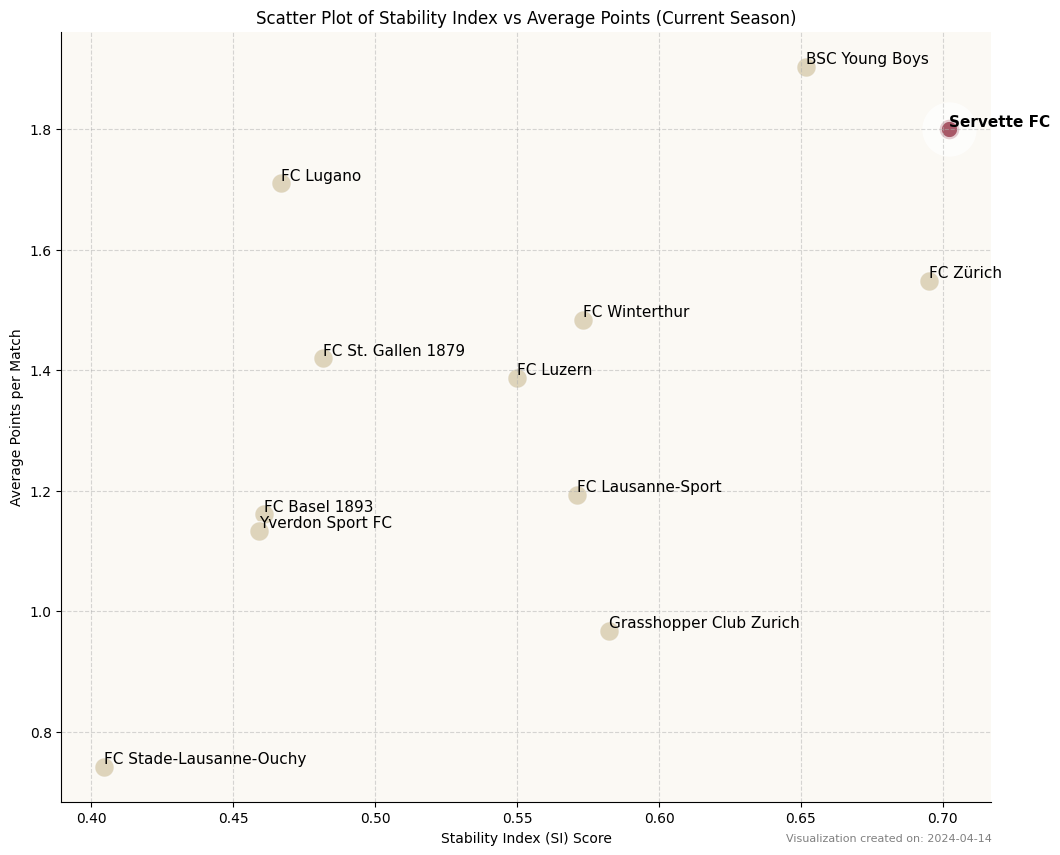

In [372]:
import matplotlib.pyplot as plt

# Merging average points with the SI scores
scatter_data_SI = merged_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot for SI vs. Average Points
plt.figure(figsize=(12, 10))
for i, point in scatter_data_SI.iterrows():
    if point['Team'] == 'Servette FC':
        # Highlight Servette FC with a unique color and bold label
        plt.scatter(point['SI'], point['AveragePoints'], color='#85142b', edgecolors='#ffffff', s=200, alpha=0.7, linewidths=25)
        plt.text(point['SI'], point['AveragePoints'], point['Team'], 
                 fontsize=11, fontweight='bold', ha='left', va='bottom')
    else:
        # Plot other teams in a default color
        plt.scatter(point['SI'], point['AveragePoints'], color='#D3C5A3', edgecolors='w', s=200, alpha=0.7)
        plt.text(point['SI'], point['AveragePoints'], point['Team'], 
                 fontsize=11, ha='left', va='bottom')

# Label the axes
plt.xlabel('Stability Index (SI) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Stability Index vs Average Points (Current Season)')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4')  # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a note about the creation date of the visual
creation_date_note = f"Visualization created on: {datetime.now().strftime('%Y-%m-%d')}"
plt.figtext(0.90, 0.07, creation_date_note, horizontalalignment='right', fontsize=8, color='gray')

# Show the plot
plt.show()


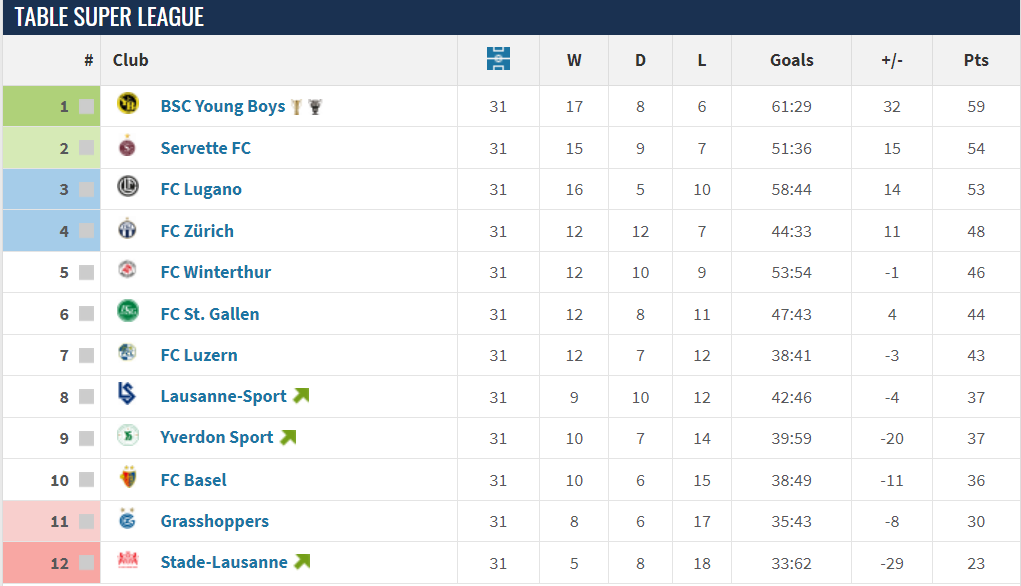

**Visualization Interpretation: Stability Index vs. Average Points with League Rankings**

The scatter plot correlates the Stability Index of Swiss Super League teams with their average points per match, juxtaposed against the league standings to identify patterns and outliers in team performance.

**Insights and Observations Adjusted with League Rankings**
- Top Performers: BSC Young Boys and Servette FC, ranking first and second in the league, also exhibit a high Stability Index, suggesting a correlation between consistency and top-tier league performance.
- Interesting Outlier: FC Lugano, while having an average Stability Index, manages to secure the third position in the league rankings, indicating that factors beyond stability, such as strategic flexibility or individual brilliance, may have a significant impact on their successful league position.
- Lower Rankings and Stability: Teams like Stade-Lausanne-Ouchy and FC Basel find themselves at the lower end of both the league table and Stability Index, hinting at a possible link between lower stability and poor league performance.

**Focus Teams Adjusted**
- FC Lugano: Despite an average Stability Index, they outperform in the league, indicating effective tactical adaptability or key player performances driving their success.
- Grasshopper Club Zurich: Low on the Stability Index yet relatively mid-table in league standings suggests that fluctuating team dynamics have not critically hampered their ability to gather points.

**One-Sentence Summary (For Pitch Slide)**
"In the competitive landscape of the League, Servette FC's robust stability complements their high ranking, while FC Lugano's resilience in the face of average stability underscores the multifaceted nature of success in football."


For comparison, here is the result of last season 2022/2023 (also cf. Data Analysis file on GitHub):

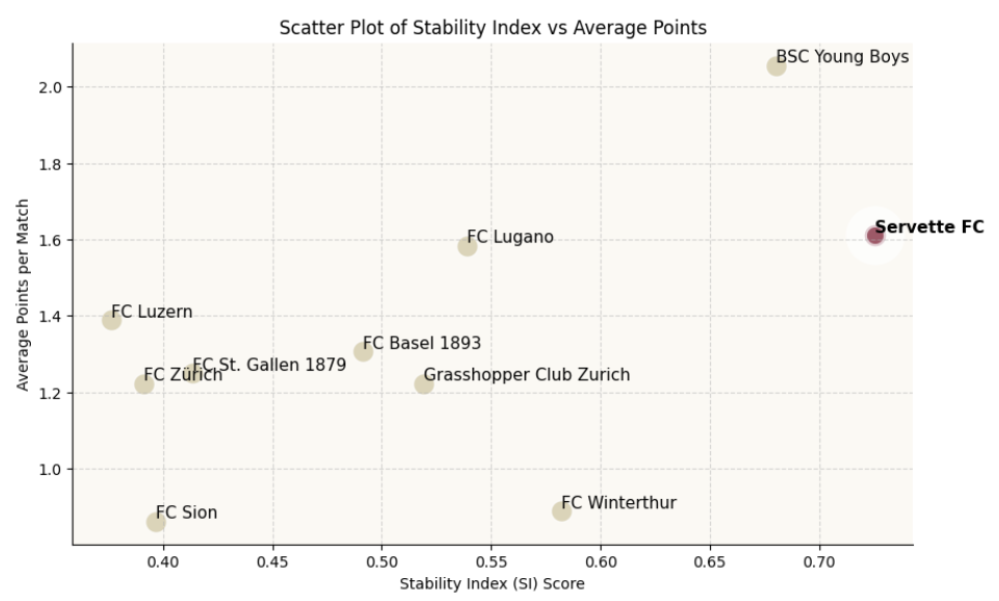

In [364]:
## Conclusion
#- Recap of the main findings from all sections.
#- Final recommendations and strategic insights for Servette FC.

## Appendix
#- Additional data, code, or queries used in the notebook.

## References
#- Sources of data and other referenced materials in the analysis.